# STAGE 3

## LOGISTIC REGRESSION

### CROSS VALIDATION

#### IMPORT DATA

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

dftrain = pd.read_csv('train_20D8GL3.csv')

# rename PAY_0 menjadi PAY
dftrain.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)

#### FEATURE ENGINEERING BERDASARKAN HASIL DARI TAHAP SEBELUMNYA

In [174]:
# menghitung total_payment_ratio
#dftrain['total_payment'] = dftrain['PAY_AMT1'] + dftrain['PAY_AMT2'] + dftrain['PAY_AMT3'] + dftrain['PAY_AMT4'] + dftrain['PAY_AMT5'] + dftrain['PAY_AMT6']
#dftrain['total_bill'] = dftrain['BILL_AMT1'] + dftrain['BILL_AMT2'] + dftrain['BILL_AMT3'] + dftrain['BILL_AMT4'] + dftrain['BILL_AMT5'] + dftrain['BILL_AMT6']
#dftrain['total_payment_ratio'] = dftrain['total_payment'] / dftrain['total_bill']

In [175]:
# menghitung credit_utilization_ratio
#dftrain['bill_amount_rata_rata'] = dftrain[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)
#dftrain['credit_utilization_ratio'] = dftrain['bill_amount_rata_rata'] / dftrain['LIMIT_BAL'] #* 100
#X_train['credit_utilization_ratio'] = X_train['credit_utilization_ratio'].apply(lambda x: '{:.2f}%'.format(x))

In [176]:
# drop feature
#dftrain = dftrain.drop(['ID', 'SEX', 'EDUCATION', 'MARRIAGE'], axis=1)

Untuk sementara kita tidak menambah feature terlebih dahulu, karena kita ingin mencari tahu apakah dengan feature yang sudah ada ini model sudah cukup baik atau belum

#### FEATURE TRANSFORM

In [177]:
# List Tipe Data Numerikal
#nums = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
#        'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
#        'total_payment', 'total_bill', 'total_payment_ratio', 'bill_amount_rata_rata', 
#        'credit_utilization_ratio']
nums = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
        'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'] 

In [178]:
# Scaler

#menggunakan standardization (scaler)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_features = dftrain[nums].columns.to_list()
for i in numerical_features:
    dftrain[i] = ss.fit_transform(dftrain[[i]])

#### FEATURE ENCODING

In [179]:
# Kolom EDUCATION
dftrain['EDUCATION'] = dftrain['EDUCATION'].replace({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others', 5 : 'unknown', 6 : 'unknown', 0 : 'others'})
dftrain['EDUCATION'] = dftrain['EDUCATION'].replace({'graduate school' : 1, 'university' : 1, 'high school' : 1, 'others' : 0, 'unknown' : 0, 'unknown' : 0, 'others' : 0})

In [180]:
# Kolom MARRIAGE
dftrain['MARRIAGE']= dftrain['MARRIAGE'].replace({1 : 'married', 2 : 'single', 3 : 'divorced', 0 : 'others'})
dftrain['MARRIAGE'] = dftrain['MARRIAGE'].replace({'married' : 1, 'single' : 0, 'divorced' : 0, 'others' : 0})

In [181]:
dftrain['default_payment_next_month'].value_counts()

0    16355
1     4645
Name: default_payment_next_month, dtype: int64

#### DEF FUNCTION

In [184]:
X = dftrain.drop(columns='default_payment_next_month', axis=1)
y = dftrain['default_payment_next_month']

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    score_accuracy = cross_validate(model, X, y, cv=5, scoring='accuracy', return_train_score=True)
    print('accuracy (crossval train): '+ str(score_accuracy['train_score'].mean()))
    print('accuracy (crossval test): '+ str(score_accuracy['test_score'].mean()))
    
    
    score_precision = cross_validate(model, X, y, cv=5, scoring='precision', return_train_score=True)
    print('precision (crossval train): '+ str(score_precision['train_score'].mean()))
    print('precision (crossval test): '+ str(score_precision['test_score'].mean()))
    
    score_recall = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score_recall['train_score'].mean()))
    print('recall (crossval test): '+ str(score_recall['test_score'].mean()))
    
    score_auc = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score_auc['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score_auc['test_score'].mean()))
    
    score_f1 = cross_validate(model, X, y, cv=5, scoring='f1', return_train_score=True)
    print('f1 (crossval train): '+ str(score_f1['train_score'].mean()))
    print('f1 (crossval test): '+ str(score_f1['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

#### RUN MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
eval_classification(lr)

accuracy (crossval train): 0.8042857142857143
accuracy (crossval test): 0.8039523809523811
precision (crossval train): 0.6768178707903052
precision (crossval test): 0.6793289815519638
recall (crossval train): 0.21996770721205597
recall (crossval test): 0.21808396124865448
roc_auc (crossval train): 0.7176862824593855
roc_auc (crossval test): 0.7166120774961093
f1 (crossval train): 0.33104645016542905
f1 (crossval test): 0.3292030367536459


Di dapatkan hasil :<br>
- Accuracy : 80.39%
- Precision : 67.93%
- Recall : 21.81%
- ROC_AUC : 71.66%
- F1 Score : 32.92%

Karena metrics score kita berfokus pada roc_auc score, dimana untuk score train dengan score test nilai nya tidak beda jauh. Hal ini mengindikasikan bahwa model tidak mengalami overfiting.

### RANDOM SPLIT

In [38]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

dftrain = pd.read_csv('train_20D8GL3.csv')

# rename PAY_0 menjadi PAY
dftrain.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)

#### FEATURE ENGINEERING BERDASARKAN HASIL DARI TAHAP SEBELUMNYA

In [39]:
# menghitung total_payment_ratio 
#dftrain['total_payment'] = dftrain['PAY_AMT1'] + dftrain['PAY_AMT2'] + dftrain['PAY_AMT3'] + dftrain['PAY_AMT4'] + dftrain['PAY_AMT5'] + dftrain['PAY_AMT6']
#dftrain['total_bill'] = dftrain['BILL_AMT1'] + dftrain['BILL_AMT2'] + dftrain['BILL_AMT3'] + dftrain['BILL_AMT4'] + dftrain['BILL_AMT5'] + dftrain['BILL_AMT6']
#dftrain['total_payment_ratio'] = dftrain['total_payment'] / dftrain['total_bill']

In [40]:
# menghitung credit_utilization_ratio
#dftrain['bill_amount_rata_rata'] = dftrain[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)
#dftrain['credit_utilization_ratio'] = dftrain['bill_amount_rata_rata'] / dftrain['LIMIT_BAL'] #* 100
#X_train['credit_utilization_ratio'] = X_train['credit_utilization_ratio'].apply(lambda x: '{:.2f}%'.format(x))

In [41]:
# drop feature
#dftrain = dftrain.drop(['ID', 'SEX', 'EDUCATION', 'MARRIAGE'], axis=1)

Sama seperti saat menggunakan metode cross validation, untuk sementara kita tidak menambah feature terlebih dahulu, karena kita ingin mencari tahu apakah dengan feature yang sudah ada ini model sudah cukup baik atau belum

#### SPLIT DATA

In [42]:
ind_var = dftrain.drop('default_payment_next_month',axis = 1)
ind_var = ind_var.columns.to_list() #kolom independent variable
X = dftrain[ind_var]
y = dftrain[['default_payment_next_month']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### HANDLE OUTLIER

In [43]:
# tipe data numerikal
nums = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4',
        'BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
        'PAY_AMT5','PAY_AMT6']

# merge data train (X_train, y_train)
merge_train = pd.concat([X_train,y_train], axis = 1)
print(f'Jumlah baris sebelum memfilter outlier : {len(merge_train)}')

for i in nums:
    q1 = merge_train[i].quantile(0.25)
    q3 = merge_train[i].quantile(0.75)
    iqr = q3 - q1
    low_limit = q1 - (1.5 * iqr)
    high_limit = q3 + (1.5 * iqr)
    filtered_entries = ((merge_train[i] >= low_limit) & (merge_train[i] <= high_limit))
    
merge_train = merge_train[filtered_entries] #filter untuk hanya mengambil value z-score < 3

print(f'Jumlah baris setelah memfilter outlier : {len(merge_train)}')

Jumlah baris sebelum memfilter outlier : 14700
Jumlah baris setelah memfilter outlier : 13245


#### FEATURE TRANSFORM

In [44]:
# memisahkan dataset train kembali
X_train = merge_train.drop('default_payment_next_month',axis = 1)
y_train = merge_train[['default_payment_next_month']]

#menggunakan standardization (scaler)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_features = X[nums].columns.to_list()
for i in numerical_features:
    scaler = ss.fit(X_train[[i]])
    X_train[i] = scaler.transform(X_train[[i]])
    X_test[i] = scaler.transform(X_test[[i]])

#### FEATURE ENCODING

In [45]:
# Kolom EDUCATION X_train
X_train['EDUCATION'] = X_train['EDUCATION'].replace({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others', 5 : 'unknown', 6 : 'unknown', 0 : 'others'})
X_train['EDUCATION'] = X_train['EDUCATION'].replace({'graduate school' : 1, 'university' : 1, 'high school' : 1, 'others' : 0, 'unknown' : 0, 'unknown' : 0, 'others' : 0})

In [46]:
# Kolom EDUCATION X_test
X_test['EDUCATION'] = X_test['EDUCATION'].replace({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others', 5 : 'unknown', 6 : 'unknown', 0 : 'others'})
X_test['EDUCATION'] = X_test['EDUCATION'].replace({'graduate school' : 1, 'university' : 1, 'high school' : 1, 'others' : 0, 'unknown' : 0, 'unknown' : 0, 'others' : 0})

In [47]:
# Kolom MARRIAGE X_train
X_train['MARRIAGE'] = X_train['MARRIAGE'].replace({1 : 'married', 2 : 'single', 3 : 'divorced', 0 : 'others'})
X_train['MARRIAGE'] = X_train['MARRIAGE'].replace({'married' : 1, 'single' : 0, 'divorced' : 0, 'others' : 0})

In [48]:
# Kolom MARRIAGE X_test
X_test['MARRIAGE'] = X_test['MARRIAGE'].replace({1 : 'married', 2 : 'single', 3 : 'divorced', 0 : 'others'})
X_test['MARRIAGE'] = X_test['MARRIAGE'].replace({'married' : 1, 'single' : 0, 'divorced' : 0, 'others' : 0})

#### HANDLE CLASS IMBALANCE

In [49]:
#check apakah variable target memiliki data yang imbalance?
print('value counts data train target', y_train.value_counts())

value counts data train target default_payment_next_month
0                             10169
1                              3076
dtype: int64


In [50]:
#penentuan variable (x) independen dengan variable (y) dependen
X = X_train[[i for i in X_train.columns]]
y = y_train['default_payment_next_month']
print(X.shape)
print(y.shape)

(13245, 24)
(13245,)


In [51]:
#balancing over and under sampling through imblearn

from imblearn import under_sampling, over_sampling

X_under, y_under = under_sampling.RandomUnderSampler(random_state = 42).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(random_state = 42).fit_resample(X, y)
X_over_smote, y_over_smote = over_sampling.SMOTE(random_state = 42).fit_resample(X, y)

print(pd.Series(y).value_counts())
print(pd.Series(y_under).value_counts())
print(pd.Series(y_over).value_counts())
print(pd.Series(y_over_smote).value_counts())

0    10169
1     3076
Name: default_payment_next_month, dtype: int64
0    3076
1    3076
Name: default_payment_next_month, dtype: int64
0    10169
1    10169
Name: default_payment_next_month, dtype: int64
0    10169
1    10169
Name: default_payment_next_month, dtype: int64


In [52]:
# untuk pemilihan sampling, kita ambil yang SMOTE (under sampling terlalu sedikit)
X_train = X_over_smote 
y_train = y_over_smote

# Test under sampling
#X_train = X_under 
#y_train = y_under

#### DEF FUNCTION

In [53]:
# def function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
from matplotlib import pyplot as plt

def eval_classification(model) :
    y_pred = model.predict(X_test) #predict label
    y_pred_train = model.predict(X_train) #predict label
    y_pred_proba = model.predict_proba(X_test) #predict probability
    y_pred_proba_train = model.predict_proba(X_train) #predict probability
    
    print('Accuracy (Train Set): %.2f' % accuracy_score(y_train, y_pred_train))
    print('Accuracy (Test Set): %.2f' % accuracy_score(y_test, y_pred))
    
    print('Precision (Train Set): %.2f' % precision_score(y_train, y_pred_train))
    print('Precision (Test Set): %.2f' % precision_score(y_test, y_pred))
    
    print('Recall (Train Set): %.2f' % recall_score(y_train, y_pred_train))
    print('Recall (Test Set): %.2f' % recall_score(y_test, y_pred))
    
    print('AUC (train-proba): %.2f' % roc_auc_score(y_train, y_pred_proba_train[:,1]))
    print('AUC (test-proba): %.2f' % roc_auc_score(y_test, y_pred_proba[:,1]))
    
    print('F1-Score (Train Set): %.2f' % f1_score(y_train, y_pred_train))
    print('F1-Score (Test Set): %.2f' % f1_score(y_test, y_pred))

#### RUN MODEL

In [54]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
eval_classification(lr)

Accuracy (Train Set): 0.69
Accuracy (Test Set): 0.70
Precision (Train Set): 0.70
Precision (Test Set): 0.39
Recall (Train Set): 0.68
Recall (Test Set): 0.58
AUC (train-proba): 0.76
AUC (test-proba): 0.71
F1-Score (Train Set): 0.69
F1-Score (Test Set): 0.46


Di dapatkan hasil :<br>
- Accuracy : 70%
- Precision : 39%
- Recall : 58%
- ROC_AUC : 71%
- F1 Score : 46%

Karena sample yang digunakan ini memiliki value yang sama (antara payment default dan yang berhasil bayar jumlah nya sama), maka fokus kita pada model ini bukan lagi terhadap nilai roc_auc. Melainkan pada Accuracy/Precision/Recall

Impact Dari :
- False Positif : Kita memprediksi bahwa user akan default, padahal user mampu bayar. Akibatnya revenue kita berkurang, karena kehilangan user yang mampu bayar
- False Negatif : Kita memprediksi bahwa user mampu bayar, padahal user gagal bayar (default). Akibatnya kita rugi karena terlanjur memberikan kredit balance kepada user

Dari case di atas, jika mempertimbangkan kerugian nya, nilai False Negatif ini harus diminimalisir. Oleh karena itu dari model, kita akan berfokus ke nilai Recall nya

Dari hasil running model :<br>
- Recall (Train Set): 0.68
- Recall (Test Set): 0.58<br>
Terindikasi bahwa ada nya overfiting (Recall Train > Recal Test (> 10%))

#### TUNING HYPERPARAMETER (RANDOMIZED)

In [55]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 1, 100)]
hyperparameters = dict(penalty=penalty, C=C)

lr = LogisticRegression()
rs = RandomizedSearchCV(lr, hyperparameters, scoring='recall', random_state=42, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Train Set): 0.70
Accuracy (Test Set): 0.71
Precision (Train Set): 0.71
Precision (Test Set): 0.40
Recall (Train Set): 0.66
Recall (Test Set): 0.58
AUC (train-proba): 0.76
AUC (test-proba): 0.71
F1-Score (Train Set): 0.69
F1-Score (Test Set): 0.47


Nilai Recall setelah dilakukan tuning, terlihat selisih nya ~8% (< 10%). Hal ini sudah cukup memenuhi score Recall agar model tidak terindikasi overfiting

#### TUNING HYPERPARAMETER (GRID)

In [56]:
from sklearn.model_selection import GridSearchCV
import numpy as np

penalty = ['l1', 'l2']
#C = [float(x) for x in np.linspace(0.0001, 1, 100)]
C = [float(x) for x in np.linspace(0.0021,0.0035, 25)] #di dapat setelah melakukan analyze curve C
hyperparameters = dict(penalty=penalty, C=C)

lr = LogisticRegression()
model = GridSearchCV(lr, hyperparameters, scoring='recall', cv=5)
model.fit(X_train, y_train)
eval_classification(model)

Accuracy (Train Set): 0.68
Accuracy (Test Set): 0.67
Precision (Train Set): 0.68
Precision (Test Set): 0.36
Recall (Train Set): 0.68
Recall (Test Set): 0.60
AUC (train-proba): 0.73
AUC (test-proba): 0.68
F1-Score (Train Set): 0.68
F1-Score (Test Set): 0.45


#### ANALYZING CURVE C

param value: 0.0001; train: 0.6702723964991641; test: 0.5809659090909091
param value: 0.0021791666666666665; train: 0.6804012193922706; test: 0.5944602272727273
param value: 0.004258333333333334; train: 0.6806962336512932; test: 0.5951704545454546
param value: 0.0063375; train: 0.6806962336512932; test: 0.5951704545454546
param value: 0.008416666666666666; train: 0.6806962336512932; test: 0.5951704545454546
param value: 0.010495833333333333; train: 0.6806962336512932; test: 0.5951704545454546
param value: 0.012575; train: 0.680794571737634; test: 0.5951704545454546
param value: 0.014654166666666666; train: 0.680794571737634; test: 0.5951704545454546
param value: 0.016733333333333333; train: 0.680794571737634; test: 0.5951704545454546
param value: 0.0188125; train: 0.680794571737634; test: 0.5951704545454546
param value: 0.020891666666666666; train: 0.680794571737634; test: 0.5951704545454546
param value: 0.022970833333333333; train: 0.680794571737634; test: 0.5951704545454546
param val

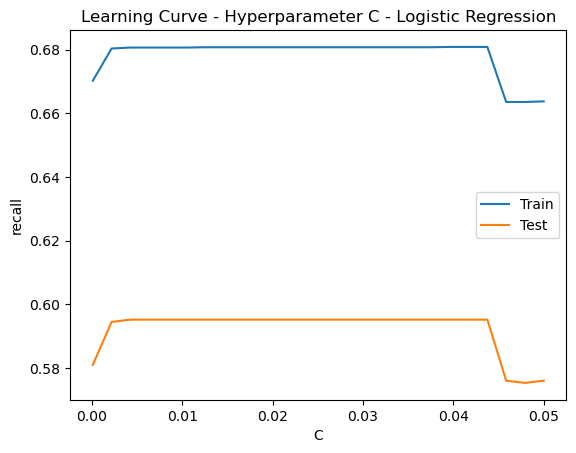

In [57]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train = model.predict(X_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('recall')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

#param_values = [float(x) for x in np.linspace(0.0001, 1, 100)]
param_values = [float(x) for x in np.linspace(0.0001, 0.05, 25)] # di dapat setelah melihat curva C
draw_learning_curve(param_values)

### FEATURE IMPORTANCE

In [62]:
X_train.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [64]:
np.array(model.best_estimator_.coef_).tolist()

[[-5.361872530157167e-07,
  -0.08513615342760891,
  -0.02213710104083159,
  0.008160845078687964,
  -0.029718636573798498,
  -0.00048338597053836796,
  0.1767229510794288,
  0.1706732444300357,
  0.15913372762040845,
  0.1457475052347872,
  0.13756770126624576,
  0.1300822405196391,
  -0.014576679645120055,
  -0.009609675083094122,
  -0.010112756699163896,
  -0.007599462687984978,
  -0.005570160171439539,
  -0.006594264169958452,
  -0.04062395122811579,
  -0.033693222593320006,
  -0.03517231421837871,
  -0.030498313786778797,
  -0.031177143086012694,
  -0.05350536681803971]]

Dari Data di atas, feature PAY_1 sampai PAY_6 merupakan feature yang memberikan informasi kepada model paling banyak. Hal ini dikarenakan kecenderungan seseorang melakukan default dapat dipengaruhi oleh status pembayaran user tiap bulannya. Apakah telat bayar atau tepat waktu

### KESIMPULAN Untuk Logistic Regression Model

Dari hasil random split di dapatkan score recall : 58%, kemudian setelah dilakukan tuning hyperparameter di dapatkan nilai recall naik menjadi 60%. Walaupun nilai recall ini sudah mencukupi, tetapi masih ada metrics yang belum memenuhi seperti precision dan f1 score. Jadi dapat disimpulkan sementara ini model dengan algorithma logistic regression kurang cocok jika diterapkan dengan dataset yang dimiliki

## Decision Tree Model

In [ ]:
# Decision Tree Modeling
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier(random_state = 42) # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.57
Precision (Test Set): 0.29
Recall (Test Set): 0.64
F1-Score (Test Set): 0.40
roc_auc (test-proba): 0.60
roc_auc (train-proba): 1.00


Diperoleh beberapa nilai metrik yang dihasilkan dari modeling, diperoleh skor accuracy sebesar 0.57, precision 0.29, dan recall sebesar 0.64. Berdasarkan nilai yang diperoleh, ada indikasi overfit berdasarkan nilai ROC_AUC dari training yang berbeda jauh dari testing. 

Kemudian akan dilakukan data validation untuk mengevaluasi kinerja model

In [ ]:
score = cross_validate(RandomForestClassifier(), X, y, cv=5, scoring='roc_auc', return_train_score=True)
print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

c:\Users\una\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\una\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\una\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\una\AppData\Local\Programs\Python\Pyt

roc_auc (crossval train): 0.9999988893492378
roc_auc (crossval test): 0.7632493725234545


Model tersebut memiliki performa yang sangat baik pada data train data dengan nilai ROC-AUC sebesar 0.99 yang mendekati 1. Namun, pada data test, performa model sedikit lebih rendah dengan nilai ROC-AUC sebesar 0.76, dan terdapat adanya indikasi overfitting.

Kemudian akan dicoba untuk memaksimalkan atau meningkatkan performa model dengan membatasi beberapa hyperparameter.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='precision')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model)

c:\Users\una\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\una\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\una\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\una\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and wil

Accuracy (Test Set): 0.68
Precision (Test Set): 0.38
Recall (Test Set): 0.63
F1-Score (Test Set): 0.47
roc_auc (test-proba): 0.72
roc_auc (train-proba): 0.80


Setelah melakukan tuning hyperparameter, diperoleh skor accuracy yang meningkat, dan skor recall yang tetap. Dan hasil roc_auc training dan testing yang lebih baik, karena memiliki selisih yang tidak beda jauh.

Selanjutnya akan digunakan learning curve untuk melihat berapa kedalaman ideal untuk memodelkan data dengan decision tree.

param value: 1; train: 0.6825154882485986; test: 0.68705342209916
param value: 2; train: 0.7161115944742719; test: 0.7090793236174087
param value: 3; train: 0.7523871548700887; test: 0.7354790317447781
param value: 4; train: 0.7653942162486914; test: 0.7372103196080799
param value: 5; train: 0.777170252857498; test: 0.7466857270450827
param value: 6; train: 0.7920833266406251; test: 0.729260332848621
param value: 7; train: 0.812876648578448; test: 0.7197903697130753
param value: 8; train: 0.8327136425387448; test: 0.714669241990634
param value: 9; train: 0.8544917668857224; test: 0.705523904403293
param value: 10; train: 0.8765375576592734; test: 0.6837184607987066
param value: 11; train: 0.8977737007673862; test: 0.6625044861044005
param value: 12; train: 0.9180224498047118; test: 0.6403097386503009
param value: 13; train: 0.9371052702299958; test: 0.5996901684336208
param value: 14; train: 0.9533445059737365; test: 0.581952634286962
param value: 15; train: 0.9662778258755578; test: 0

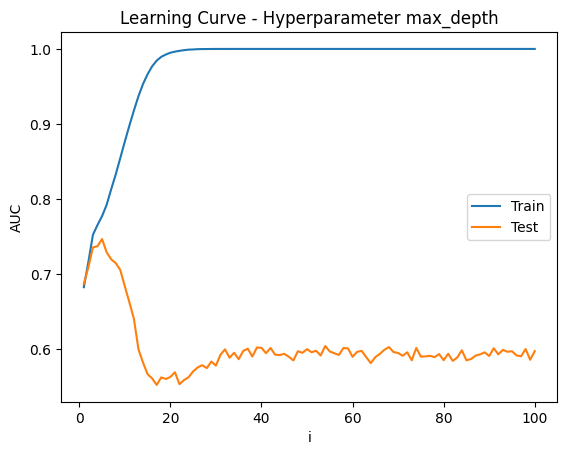

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('i')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter max_depth')
    plt.legend()
    plt.show()

# learning curve
import numpy as np
param_values = [int(x) for x in np.linspace(1,100,100)]
draw_learning_curve(param_values)

Dari max_depth, nilai kedalaman ideal berada pada sekitaran range 6 hingga 11.

param value: 1; train: 0.9999995164810387; test: 0.5916866823385118
param value: 2; train: 0.9973650972669468; test: 0.5931444484966178
param value: 3; train: 0.9913387683636754; test: 0.6006518498429718
param value: 4; train: 0.9841941906531317; test: 0.6183090986908124
param value: 5; train: 0.9776899032566558; test: 0.6342990846604847
param value: 6; train: 0.9705821406798224; test: 0.624813659708801
param value: 7; train: 0.9649569729531389; test: 0.6390402001412325
param value: 8; train: 0.9577304146027136; test: 0.6328952533821453
param value: 9; train: 0.9525842787813283; test: 0.6351490490039398
param value: 10; train: 0.9464450336950342; test: 0.6312916525356798
param value: 11; train: 0.9403966611623189; test: 0.6422542253586561
param value: 12; train: 0.9352441670665932; test: 0.6486337852151937
param value: 13; train: 0.9310885488484846; test: 0.6471894483340148
param value: 14; train: 0.9263975736012804; test: 0.6547302413959711
param value: 15; train: 0.9223873495348225; 

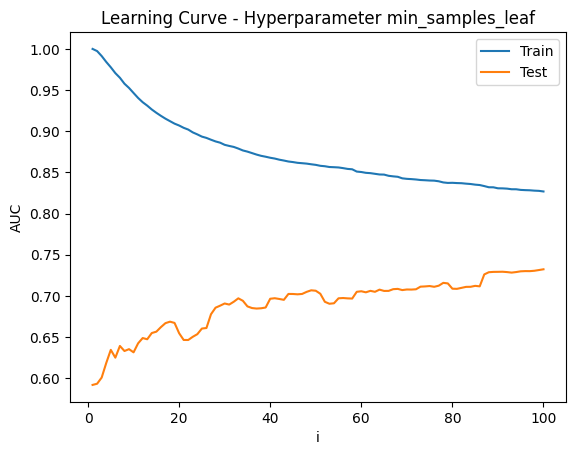

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(min_samples_leaf=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('i')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter min_samples_leaf')
    plt.legend()
    plt.show()

# learning curve
import numpy as np
param_values = [int(x) for x in np.linspace(1,100,100)]
draw_learning_curve(param_values)

Dari min_samples_leaf, nilai kedalaman ideal berada pada sekitaran range 97 hingga 100.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [6,7,8,9,10,11] # Maximum number of levels in tree
min_samples_leaf = [97,98,99,100] # Minimum number of samples required at each leaf node

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_leaf=min_samples_leaf,
                       )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, hyperparameters, cv=5, scoring='recall')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model)

Accuracy (Test Set): 0.64
Precision (Test Set): 0.34
Recall (Test Set): 0.64
F1-Score (Test Set): 0.45
roc_auc (test-proba): 0.73
roc_auc (train-proba): 0.82


Setelah menyesuaikan max_depth dan min_samples_leaf dengan hasil dari learning curve, diperoleh skor accuracy yang meningkat dibanding tanpa tuning hyperparameter, dan skor recall yang tetap. Dan hasil roc_auc training dan testing yang lebih baik, karena memiliki selisih lebih kecil dibanding dengan model tanpa tuning hyperparameter.

Selanjutnya akan dilihat feature apa saja yang dianggap penting.

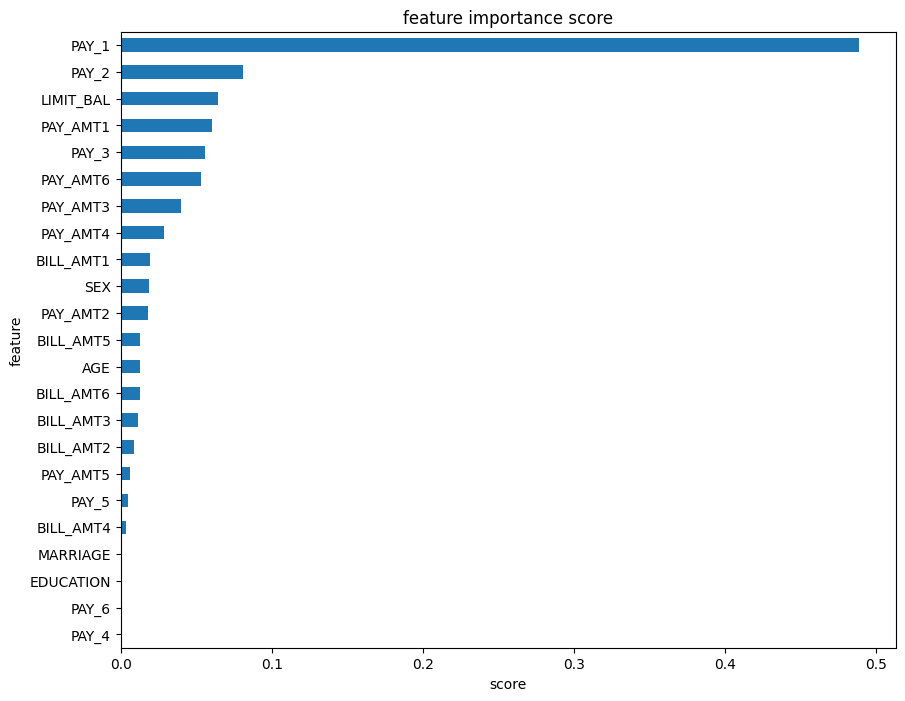

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
    
show_feature_importance(model.best_estimator_)

Feature Pay_1, Pay_2, dan limit_bal dianggap merupakan feature importance paling penting dan memberikan informasi paling banyak di model.

Selanjutnya, akan dicoba untuk drop 5 feature yang dianggap kurang memberikan informasi pada modeling, dan akan dilihat apakah akan memberikan hasil performa yang lebih bagus.

In [ ]:
X_train = X_train.drop(['PAY_4', 'EDUCATION', 'MARRIAGE', 'BILL_AMT4', 'PAY_6'], axis = 1)
X_test = X_test.drop(['PAY_4', 'EDUCATION', 'MARRIAGE', 'BILL_AMT4', 'PAY_6'], axis = 1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [6,7,8,9,10,11] # Maximum number of levels in tree
min_samples_leaf = [97,98,99,100] # Minimum number of samples required at each leaf node

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_leaf=min_samples_leaf,
                       )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, hyperparameters, cv=5, scoring='recall')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model)

Accuracy (Test Set): 0.64
Precision (Test Set): 0.34
Recall (Test Set): 0.64
F1-Score (Test Set): 0.45
roc_auc (test-proba): 0.73
roc_auc (train-proba): 0.82


Hasil menunjukkan dengan menghapus beberapa feature tersebut tidak memberikan pengaruh yang signifikan terhadap performa model.

### Kesimpulan dari model Decision Tree

Dari modeling tanpa tuning hyperparameter, diperoleh recall : 0.64, kemudian setelah dilakukan tuning hyperparameter di dapatkan nilai recall masih sama diperoleh 0.64, tetapi setelah dilakukan drop beberapa feature dengan skor feature importance yang rendah, diperoleh skor recall sebesar 0.66. Walaupun nilai recall ini sudah mencukupi, tetapi masih ada metrics yang belum memenuhi seperti precision dan f1 score yang masih di bawah 0.5. 
Selain itu, diketahui bahwa Pay_1 atau Status pembayaran bulan pertama memberikan informasi atau pengaruh pada prediksi paling banyak.

## Kesimpulan

Setelah melakukan experiment dengan model logistic regression dan decision tree, menghasilkan hal yang sama yaitu Pay_1 memiliki feature importance yang tinggi dalam prediksi. Hal ini mungkin terjadi karena kecenderungan pembayaran client dapat dilihat dari bagaimana pembayaran dia pada awal kredit, jika di awal kredit sudah telat bayar atau gagal bayar maka memiliki kecenderungan untuk default yang sangat tinggi.

Untuk hasil model juga keduanya menghasilkan performa yang cukup baik walaupun belum maksimal, untuk selanjutnya mungkin dapat kembali dilakukan experiment dengan model lain atau dengan tuning hyperparameter kembali.